<a href="https://colab.research.google.com/github/vrathod07/CNN/blob/master/uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Processing
import pandas as pd
import numpy as np

#Data Visulaisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import os

In [ ]:
df = pd.read_csv("uber-raw-data-jun14.csv")

In [ ]:
df.head(10)

,Date/Time,Lat,Lon,Base,month,weekday,day,hour,minute
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512,6,Sunday,1,0,0
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512,6,Sunday,1,0,1
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512,6,Sunday,1,0,4
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512,6,Sunday,1,0,4
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512,6,Sunday,1,0,7
5,2014-06-01 00:08:00,40.7152,-73.9917,B02512,6,Sunday,1,0,8
6,2014-06-01 00:08:00,40.7282,-73.9910,B02512,6,Sunday,1,0,8
7,2014-06-01 00:08:00,40.3042,-73.9794,B02512,6,Sunday,1,0,8
8,2014-06-01 00:09:00,40.7270,-73.9915,B02512,6,Sunday,1,0,9
9,2014-06-01 00:10:00,40.7221,-73.9965,B02512,6,Sunday,1,0,10


In [ ]:
df.shape

(318227, 4)

In [ ]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         1
month        0
weekday      0
day          0
hour         0
minute       0
dtype: int64

In [ ]:
df.duplicated().sum()

4441

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318227 entries, 0 to 318226
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  318227 non-null  object 
 1   Lat        318227 non-null  float64
 2   Lon        318227 non-null  float64
 3   Base       318226 non-null  object 
dtypes: float64(2), object(2)
memory usage: 9.7+ MB


In [ ]:
df.describe()

,Lat,Lon,month,day,hour,minute
count,318227.000000,318227.000000,318227.0,318227.000000,318227.000000,318227.000000
mean,40.740033,-73.973734,6.0,13.740443,14.122284,29.382777
std,0.038623,0.131630,0.0,8.656915,5.899055,17.336326
min,40.068200,-74.685600,6.0,1.000000,0.000000,0.000000
25%,40.722100,-73.996600,6.0,6.000000,10.000000,14.000000
50%,40.744000,-73.983500,6.0,12.000000,15.000000,29.000000
75%,40.761500,-73.967500,6.0,21.000000,19.000000,44.000000
max,41.319900,-7.000000,6.0,30.000000,23.000000,59.000000


In [ ]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [ ]:
df['Date/Time']=pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [ ]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [ ]:
df['month']=df['Date/Time'].dt.month
df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['hour']=df['Date/Time'].dt.hour
df['minute']=df['Date/Time'].dt.minute

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base,month,weekday,day,hour,minute
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512,6,Sunday,1,0,0
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512,6,Sunday,1,0,1
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512,6,Sunday,1,0,4
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512,6,Sunday,1,0,4
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512,6,Sunday,1,0,7


In [ ]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
month                 int64
weekday              object
day                   int64
hour                  int64
minute                int64
dtype: object

#01. Which day of the month sees the highest number of uber trips?

In [ ]:
weekday=pd.DataFrame(df[['day','month']].value_counts()).reset_index()
weekday.columns=['Day','Month','Count']
weekday['Day']=pd.Categorical(weekday['Day'],categories=[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31],ordered=True)
weekday['Month']=pd.Categorical(weekday['Month'],categories=[4,5,6,7,8,9],ordered=True)

In [ ]:
fig1=px.bar(weekday,
      x='Day',
      y='Count',
      color='Month',
      template='plotly_dark',
      labels={'Count':'Number of Trips','Day':'Day of the Month'},
      width=1100,
      height=500,
      category_orders={"Month": [4,5,6,7,8,9]},
      color_discrete_sequence=['#2C2C3E','#2E5467','#1E7F84','#33AC8D','#78D584','#D1FA74'],
    text='Count')
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig1.update_layout(title_text='Uber trip by Days', title_x=0.5)
fig1.show()

In [ ]:
#02. Which is the busiest hour in the day for uber cabs?

In [ ]:
hour=pd.DataFrame(df['hour'].value_counts()).reset_index()
hour.columns=['Hour','Count']
hour=hour.sort_values(by='Hour')

In [ ]:
fig2=px.bar(hour,
      x='Hour',
      y='Count',
      template='plotly_dark',
      labels={'Count':'Number of Trips'},
      height=400,
      width=1100,
      text='Count'
      )

fig2.show()

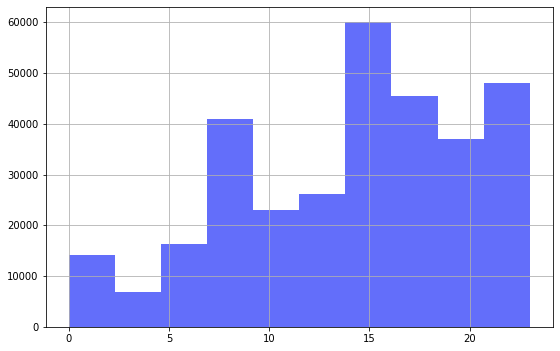

In [ ]:
plt.figure(figsize=(20,20))
plt.style.use("seaborn-dark-palette")
colors = ['#636EFA']
for i, month in enumerate(df['month'].unique()):
    plt.subplot(3,2,i+1)
    df[df['month']==month]['hour'].hist(color=colors)